# 1. Ground true

## Import

* import numpy for matrix
* import matplotlib.pyplot for plotting
* import math for math function
* import random for random variable. Creating noise or start point etc

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math
import random

## Init constant value

In [2]:
objectNum = 5

startTime_Sec = 0
endTime_Sec = 10
dtObject = 0.005 # 5ms
dtLidar = 0.025 # 25ms
dtRadar = 0.050 # 50ms

## Const accelerate equation

In [3]:
class Trajectory():
    def __init__ (self, times):
        self.x = np.zeros_like(times)
        self.y = np.zeros_like(times)
        
        self.rho = np.zeros_like(times)
        self.phi = np.zeros_like(times)
    
class Object():
    #def __init__ (self, times, x, y, ID, color):
        #self.color = color
    def __init__ (self, times, x, y, ID):
        self.ID = ID
        self.states = []
        self.trajectory = Trajectory(times)
        
        #state: x, y, x`, y`, x``, y``
        self.state_ca = np.matrix([0.0, 0.0, 0.0, 0.0, 0.0, 0.0]).T

        self.state_ca[0] = x
        self.state_ca[1] = y

        self.F = np.matrix([[1.0, 0.0, dtObject, 0.0, 1/2.0*dtObject**2, 0.0],
                         [0.0, 1.0, 0.0, dtObject, 0.0, 1/2.0*dtObject**2],
                         [0.0, 0.0, 1.0, 0.0, dtObject, 0.0],
                         [0.0, 0.0, 0.0, 1.0, 0.0, dtObject],
                         [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
                         [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
        
        self.B = np.matrix([[0.0, 0.0],
                           [0.0, 0.0],
                           [0.0, 0.0],
                           [0.0, 0.0],
                           [1.0, 0.0],
                           [0.0, 1.0]])
    
    def getState(self, ax, ay):
        accel = np.matrix([ax, ay]).T
        self.state_ca = self.F*self.state_ca + self.B*accel
        
        return self.state_ca
        
    def plot(self, times, axes, ID):
        axes[0].plot (self.trajectory.x, self.trajectory.y)
        axes[0].set(xlabel = 'x', ylabel = 'y')
        axes[0].set_title('object trajectory')
        
        axes[1].plot (times, self.trajectory.x)
        axes[1].set(xlabel = 'times', ylabel = 'x')
        axes[1].set_title('object x over time')
        
        axes[2].plot (times, self.trajectory.y)
        axes[2].set(xlabel = 'times', ylabel = 'y')
        axes[2].set_title('object x over time')


## Creating object and getting object states

In [4]:
objects = []
times = np.linspace (startTime_Sec, endTime_Sec, int(endTime_Sec/dtObject))

# create object with random position
for objectIdx in range(objectNum):
    x = random.uniform(0.0, 10.0)
    y = random.uniform(0.0, 10.0)
    
    object = Object(times, x, y, objectIdx)
    objects.append(object)


# get object state
for objectIdx, object in enumerate(objects):
    for t in range(len(times)):
        accel = 0.0
        radian = 0.0
    
        if (t % 5) == 0:
            accel = random.uniform(-10.0, 10.0)
            radian = random.uniform(-math.pi, math.pi)
        
        state = object.getState(accel*math.cos(radian), accel*math.sin(radian))

        object.states.append(state)
        object.trajectory.x[t] = state[0, 0]
        object.trajectory.y[t] = state[1, 0]

## Plotting object trajectory and x, y

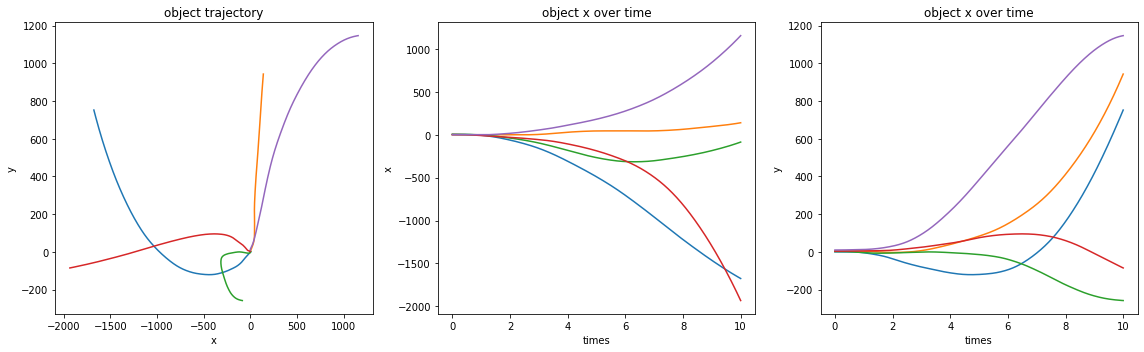

In [5]:
fig, axes = plt.subplots(1, 3, figsize = (16, 5))

for objectIdx, object in enumerate (objects):
    objects[objectIdx].plot(times, axes, objectIdx)
    
plt.tight_layout()